# Newton's Method for Finding Equation Roots

Newton's method, also known as Newton-Raphson, is an approach for finding the roots of nonlinear equations and is one of the most common root-finding algorithms due to its relative simplicity and speed. The [root of a function](http://mathworld.wolfram.com/Root.html) is the point at which $f(x) = 0$. Many equations have more than one root. Every real polynomial of odd degree has an odd number of real roots ("Zero of a function," 2016). Newton-Raphson is an iterative method that begins with an initial guess of the root. The method uses the derivative of the function $f'(x)$ as well as the original function $f(x)$, and thus only works when the derivative can be determined.

## Newton-Raphson Iteration

The initial guess of the root is typically denoted $x_0$ with the true root represented by $r$. The true root can thus be expressed as $r = x_0 + h$, and therefore $h = r - x_0$, where $h$ measures how far the guess is from the true value of the root. As $h$ will be small, a linear tangent line is used to approximate the location of the root and can be written as:

$$ 0 = f(r) = f(x_0 + h) \approx f(x_0) + hf'(x_0) $$

where $h$ is approximately:

$$ h \approx -\frac{f(x_0)}{f'(x_0)} $$

Unless the derivative $f'(x_o)$ is close to 0. Combining this approximation with the value of the true root yields:

$$ r = x_0 + h \approx x_0 -\frac{f(x_0)}{f'(x_0)} $$

Therefore the new estimate of $r$, $x_1$, becomes:

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Then the new estimate $x_2$ is obtained from $x_1$ in the same manner:

$$ x_2 = x_1 - \frac{f(x_1)}{f'(x_1)} $$

The iteration of Newton-Raphson can thus be generalized:

$$ x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

## Newton-Raphson Convergence

Newton-Raphson is not a foolproof method in that it can fail to converge to a solution. In fact, there are no 'perfect' numerical methods that will always converge on a solution. Particularly, the assumption $f''(x)$ exists and is continuous near $r$ must be made.

The method can also fail to converge when $f'(x)$ is close to 0. For example, 5.02 is close to 5 as it is only `r (5.02 - 5) / 5 * 100`% different, however, $5.02/10^{-7}$, is quite different than $5/10^{-7}$.

## Examples of Newton-Raphson

An example will help illuminate further on the definitions and equations above. The NR method can be used to approximate square roots such as $\sqrt{10}$. The square root of 10 is about three, so we can use that as a good starting value.

It often helps to plot the function to see where the roots occur. The function is first rearranged to be an expression of $f(x)$ before plotting.

$$ x = \sqrt{10} $$

$$ x - \sqrt{10} = 0 $$

$$ f(x) = x^2 - 10 $$

In [1]:
from sympy import symbols, limit, diff, sin, cos, log, tan, sqrt, init_printing, plot, oo
from mpmath import ln, e, pi

init_printing()
x = symbols('x')
y = symbols('y')

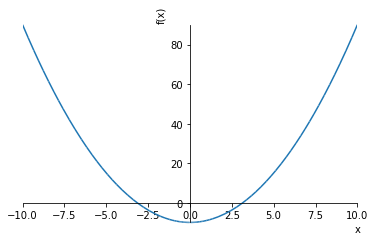

In [2]:
plot(x ** 2 - 10)

It can be seen from the graph the function crosses the x-axis at $\sqrt{10}$ on an interval [3, 4]. The derivative of the function is $2x$.

Solving for the function root using the Newton-Raphson method proceeds as follows using three as an initial guess.

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} = x_n - \frac{x_n^2 - 10}{2x_n} $$

$$ x_{1} = 3 - \frac{(3)^2 - 10}{2(3)} = 3.166667 $$

$$ x_{2} = 3.166667 - \frac{(3.166667)^2 - 10}{2(3.166667)} = 3.162281 $$

$$ x_{3} = 3.162281 - \frac{(3.162281)^2 - 10}{2(3.162281)} = 3.162278 $$

And so on until the ${x_n}$ estimates are within a particular level of tolerance. This example converges in three iterations. Thus $3.162278$ is the estimated root of the function. This result can be verified by simply taking the square root of 10.

In [30]:
10 ** (1/2) # math.sqrt(10)

## Newton-Raphson Method in Python

As an example, suppose the equation we are interested in locating the roots is: 

$$ f(x) = x^3 - 2x - 5 $$

In [17]:
def f(x):
    return x ** 3 - 2 * x - 5

Plot the function to visualize how the equation behaves and where any roots may be located.

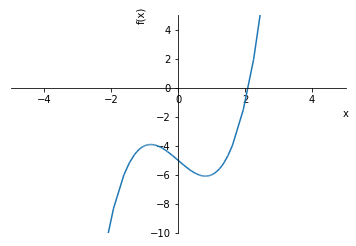

In [26]:
plot(x ** 3 - 2 * x - 5, xlim=(-5,5), ylim=(-10,5))

In [29]:
from mathpy.numerical.roots import newtonraph
from scipy.optimize import newton

It looks like the function equals 0 when $y$ is about 2. To find the root of the equation, use the `uniroot` function with a starting value of 2 and upper bound of 3. 

In [27]:
newtonraph(f, 2)[0]

In [28]:
newton(f,2)

As suspected, the root of the function is very close to 2 at $2.09455$. The iterations can be written as follows:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} = x_n - \frac{x_n^3 - 2x - 5}{3x_n^2 - 2} $$

$$ x_{1} = 2 - \frac{(2)^3 - 2(2) - 5}{3(2)^2 - 2} = 1.281239 $$

$$ x_{2} = 1.281239 - \frac{(1.281239)^3 - 2(1.281239) - 5}{3(1.281239)^2 - 2} = 3.147821 $$

$$ x_{3} = 3.147821 - \frac{(3.147821)^3 - 2(3.147821) - 5}{3(3.147821)^2 - 2} = 2.430257 $$

$$ x_{4} = 2.430257 - \frac{(2.430257)^3 - 2(2.430257) - 5}{3(2.430257)^2 - 2} = 2.144418 $$

$$ x_{5} = 2.144418 - \frac{(2.144418)^3 - 2(2.144418) - 5}{3(2.144418)^2 - 2} = 2.095897 $$

$$ x_{6} = 2.095897 - \frac{(2.095897)^3 - 2(2.095897) - 5}{3(2.095897)^2 - 2} = 2.094552 $$

## References

Agresti, A. (2002). Categorical data analysis (2nd ed.). New York, NY: Wiley-Interscience.

Kiusalaas, J. (2013). Numerical methods in engineering with python (2nd ed.). New York: Cambridge University Press.

The Newton-Raphson method. Retrieved from https://www.math.ubc.ca/~anstee/math104/104newtonmethod.pdf

Stewart, J. (2007). Essential calculus: Early transcendentals. Belmont, CA: Thomson Higher Education.

Zero of a function (2016). In Wikipedia. Retrieved from https://en.wikipedia.org/wiki/Zero_of_a_function#Polynomial_roots